## Create images

In [12]:
from fastcore.all import *
from fastai.vision.all import *
from PIL import Image,ImageDraw
import numpy as np 
from matplotlib import pyplot as plt


max_num = 50
for operation in ["+","-","x"]:
    for num_1 in range(max_num+1):
        for num_2 in range(num_1,max_num+1):
            res = eval(f"{num_2} {operation.replace('x','*')} {num_1}")
            if res<=max_num:
                res = str(res).zfill(3)
                num_1_string = str(num_1).zfill(3)
                num_2_string = str(num_2).zfill(3)
                if not os.path.exists(f"math/{res}"):
                    os.makedirs(f"math/{res}")
                img = Image.new('RGB', (75, 75))
                d = ImageDraw.Draw(img)
                d.text((10, 25), f'{num_2_string} {operation} {num_1_string}', fill=(255, 255, 255))
                img.save(f"math/{res}/{num_2_string}{operation}{num_1_string}.jpg")
        


## Set up datablock

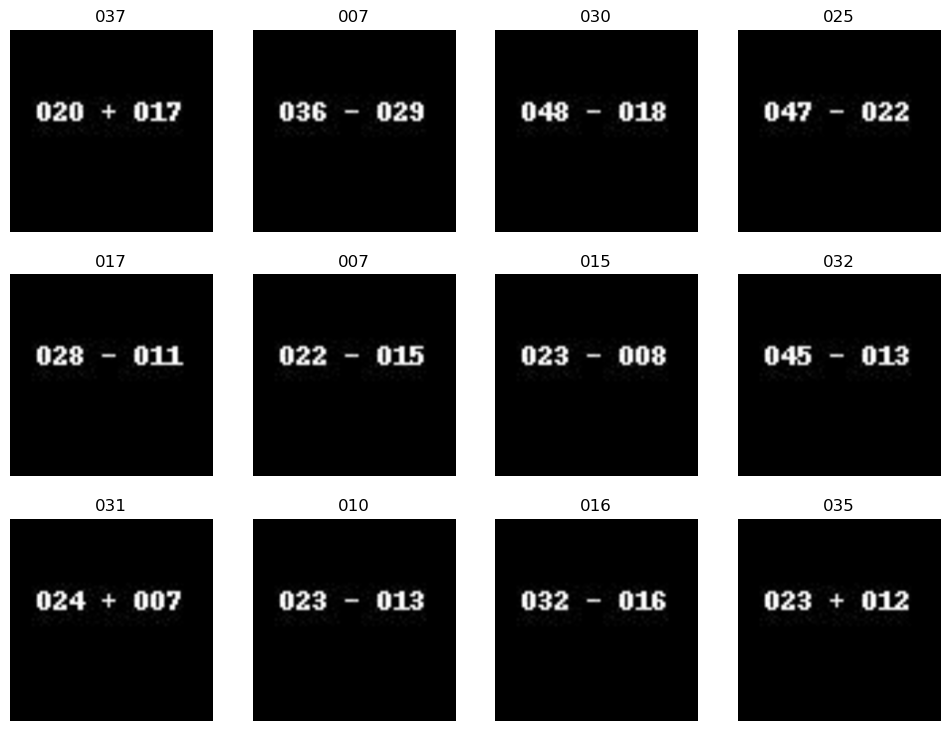

In [2]:
path = Path('math')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=12)

## Train using resnet50

In [4]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
with learn.no_bar():
    learn.fine_tune(1000)

# Killed after ~300 since seemed like it was leveling off

[0, 5.659853458404541, 5.074215412139893, 0.9814814925193787, '00:07']
[0, 4.704216003417969, 6.133007526397705, 0.9837962985038757, '00:09']
[1, 4.3624372482299805, 4.636380672454834, 0.9629629850387573, '00:09']
[2, 4.10806131362915, 4.29553747177124, 0.9722222089767456, '00:09']
[3, 3.9031200408935547, 4.279061794281006, 0.9699074029922485, '00:09']
[4, 3.667935848236084, 4.285231590270996, 0.9745370149612427, '00:09']
[5, 3.5184924602508545, 4.218855857849121, 0.9745370149612427, '00:09']
[6, 3.355293035507202, 4.335188865661621, 0.9768518805503845, '00:09']
[7, 3.2161858081817627, 4.37415885925293, 0.9768518805503845, '00:09']
[8, 3.0873043537139893, 4.398070335388184, 0.9745370149612427, '00:09']
[9, 2.968602418899536, 4.4781880378723145, 0.9745370149612427, '00:09']
[10, 2.868795871734619, 4.474462985992432, 0.9745370149612427, '00:09']
[11, 2.7660629749298096, 4.6086530685424805, 0.9768518805503845, '00:09']
[12, 2.662818193435669, 4.552329063415527, 0.9745370149612427, '00:09'

KeyboardInterrupt: 

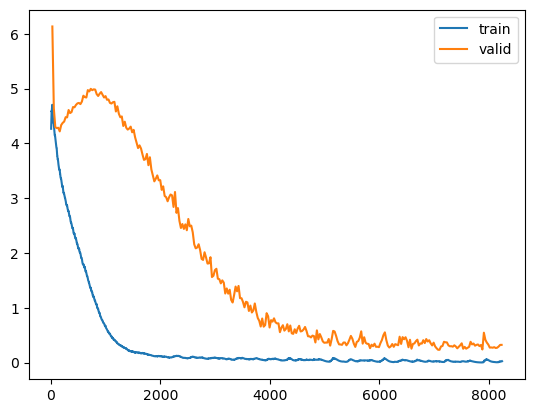

In [5]:
# NOTE: must be done before doing anything else with the learner that may flush the recorder
learn.recorder.plot_loss()

## Export

In [6]:
learn.export('math_resnet50.pkl')

## Plot confusion matrix and top loss images

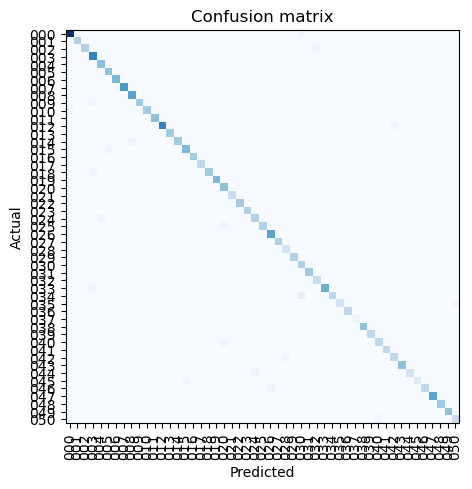

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(plot_txt=False)

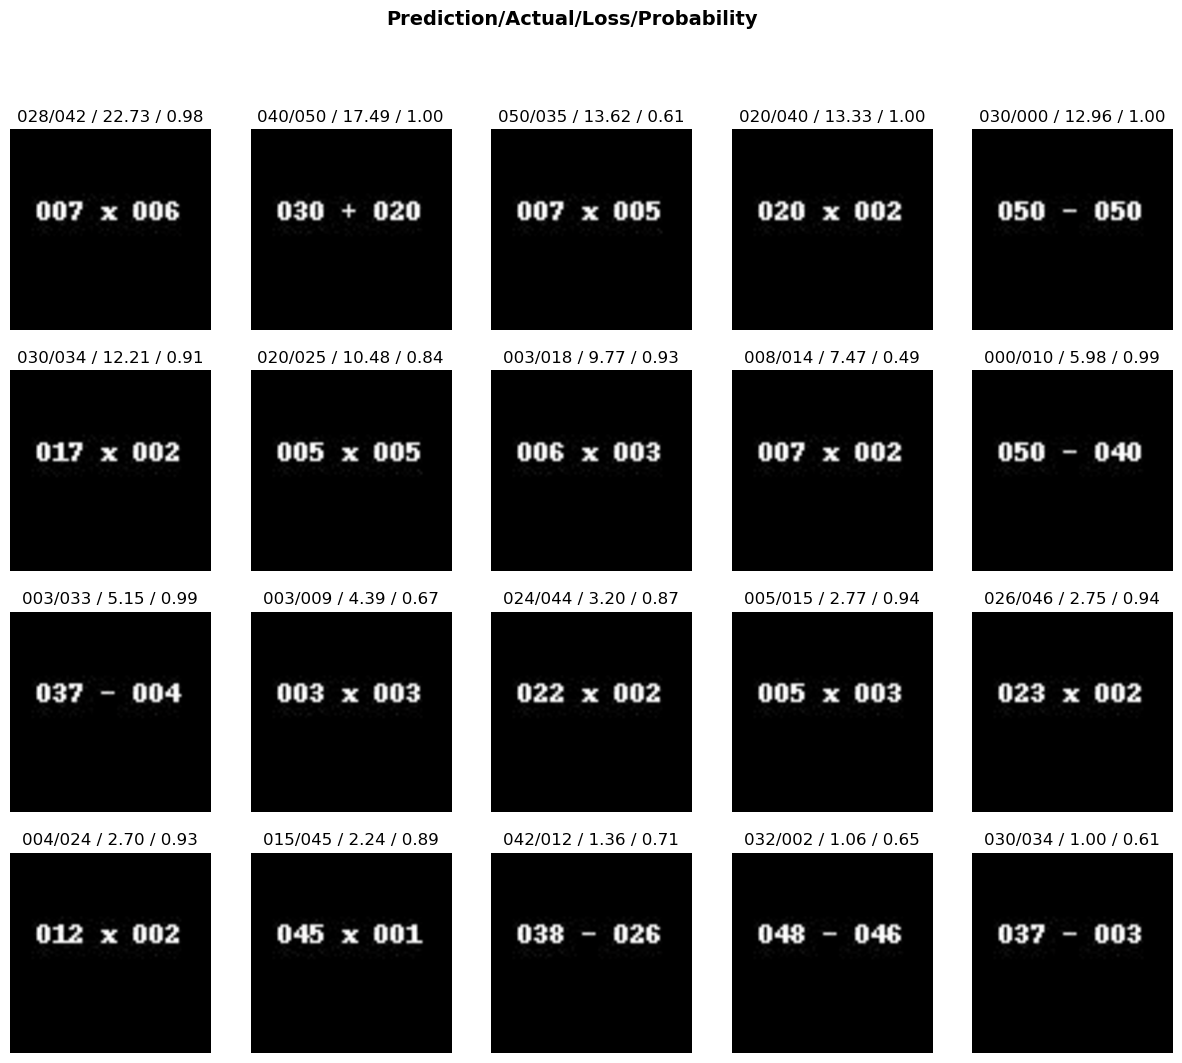

In [8]:
interp.plot_top_losses(20, nrows=4)